In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
import logging

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Get the absolute path to the parent directory
parent_dir = os.path.dirname(os.getcwd())

# Add the parent directory to sys.path\n
sys.path.append(parent_dir)
from src import handler, visualizer

In [3]:
# Set up logging
logging.basicConfig(filename='../logs/data_scraping.log', level=logging.INFO, 
                    format='%(asctime)s - %(levelname)s - %(message)s')

# Data Gathering

In [4]:
medical_df = pd.read_csv("../data/data_raw.csv", encoding='utf8')

In [5]:
medical_df.head()

,id,date,message,sender_id,views,time_of_day,post_hour,channel_name
0,864,2023-12-18 17:04:02+00:00,https://youtu.be/5DBoEm-8kmA?si=LDLuEecNfULJVD...,-1001102021238,5700,PM,17,Doctors Ethiopia
1,863,2023-11-03 16:14:39+00:00,ዶክተርስ ኢትዮጵያ በ አዲስ አቀራረብ በ ቴሌቪዥን ፕሮግራሙን ለመጀመር ከ...,-1001102021238,8397,PM,16,Doctors Ethiopia
2,862,2023-10-02 16:37:39+00:00,ሞት በስኳር \n\nለልጆቻችን የምናሲዘው ምሳቃ ሳናቀው እድሚያቸውን ይቀን...,-1001102021238,10855,PM,16,Doctors Ethiopia
3,861,2023-09-16 07:54:32+00:00,ከ HIV የተፈወሰ ሰው አጋጥሟችሁ ያቃል ? ፈውስ እና ህክምና ?\n\nሙ...,-1001102021238,11279,AM,7,Doctors Ethiopia
4,860,2023-09-01 16:16:15+00:00,በቅርብ ጊዜ በሃገራችን ላይ እየተስተዋለ ያለ የተመሳሳይ ፆታ ( Homos...,-1001102021238,13086,PM,16,Doctors Ethiopia


# Data OverView

In [5]:
data_obj = handler.Handler(medical_df)

In [7]:
data_obj.data_overview()

Number of rows: 493
Number of columns: 8

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            493 non-null    int64 
 1   date          493 non-null    object
 2   message       493 non-null    object
 3   sender_id     493 non-null    int64 
 4   views         493 non-null    int64 
 5   time_of_day   493 non-null    object
 6   post_hour     493 non-null    int64 
 7   channel_name  493 non-null    object
dtypes: int64(4), object(4)
memory usage: 30.9+ KB
None


# Data Cleaning
- Handling missing values
- Handling duplicate values
- Handling outliers 

## 1. Handling Missing Values
Handling missing values is important step in data cleaning. Missing values can be represented as NaN (Not a Number) or empty strings. I use the `isnull()` function to identify missing values and the `dropna()` function to remove rows with missing values

In [8]:
data_obj.calculate_missing_percentage()

              Missing Values Percentage Missing
id                         0              0.00%
date                       0              0.00%
message                    0              0.00%
sender_id                  0              0.00%
views                      0              0.00%
time_of_day                0              0.00%
post_hour                  0              0.00%
channel_name               0              0.00%


There is no missing values in the dataset.

## 2. Handling Duplicate Values
Handling duplicate values involves identifying and removing duplicate rows from the DataFrame. I use the `duplicated()` function to identify duplicate rows and the `drop_duplicates()` function to remove them.

In [9]:
data_obj.check_duplicate()


Duplicated values:
0 duplicated rows


## 3. Handling outliers
Handling outliers is a crucial step in data cleaning and preprocessing. Here are the key steps to handle outliers effectively:
#### Identifying Outliers
The first step is to identify the presence of outliers in my dataset. I Use box plots.

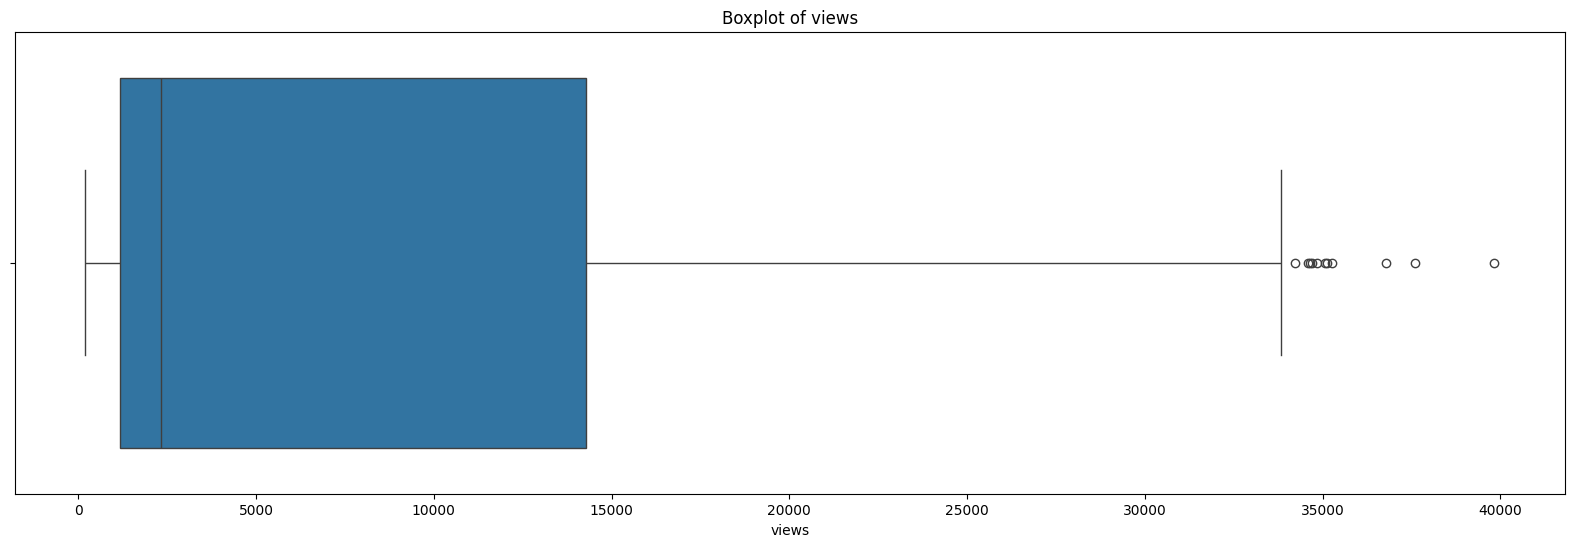

In [10]:
visualizer.plot_boxplot(medical_df, 'views')

The whisker of the above box plots shows that there is an outlier in the columns.

### Removing Outliers

In [6]:
medical_df = data_obj.remove_iqr_outliers('views')

# Feature Extraction

In [7]:
medical_df = data_obj.create_date_features('date')
medical_df

,id,date,message,sender_id,views,time_of_day,post_hour,channel_name,day,day_of_week,month,year
0,864,2023-12-18 17:04:02+00:00,https://youtu.be/5DBoEm-8kmA?si=LDLuEecNfULJVD...,-1001102021238,5700.0,PM,17,Doctors Ethiopia,18,Monday,December,2023
1,863,2023-11-03 16:14:39+00:00,ዶክተርስ ኢትዮጵያ በ አዲስ አቀራረብ በ ቴሌቪዥን ፕሮግራሙን ለመጀመር ከ...,-1001102021238,8397.0,PM,16,Doctors Ethiopia,3,Friday,November,2023
2,862,2023-10-02 16:37:39+00:00,ሞት በስኳር \n\nለልጆቻችን የምናሲዘው ምሳቃ ሳናቀው እድሚያቸውን ይቀን...,-1001102021238,10855.0,PM,16,Doctors Ethiopia,2,Monday,October,2023
3,861,2023-09-16 07:54:32+00:00,ከ HIV የተፈወሰ ሰው አጋጥሟችሁ ያቃል ? ፈውስ እና ህክምና ?\n\nሙ...,-1001102021238,11279.0,AM,7,Doctors Ethiopia,16,Saturday,September,2023
4,860,2023-09-01 16:16:15+00:00,በቅርብ ጊዜ በሃገራችን ላይ እየተስተዋለ ያለ የተመሳሳይ ፆታ ( Homos...,-1001102021238,13086.0,PM,16,Doctors Ethiopia,1,Friday,September,2023
...,...,...,...,...,...,...,...,...,...,...,...,...
488,4962,2024-05-27 05:48:50+00:00,https://www.facebook.com/100064606425124/posts...,-1001342468332,2714.0,AM,5,EFDA የኢትዮጵያ የምግብና መድኃኒት ባለስልጣን,27,Monday,May,2024
489,4961,2024-05-16 12:53:01+00:00,አገር ተረካቢን ትውልድ ከትምባሆ ጉዳት በመጠበቅ አዲስ አበባን ከትምባሆ ...,-1001342468332,3993.0,PM,12,EFDA የኢትዮጵያ የምግብና መድኃኒት ባለስልጣን,16,Thursday,May,2024
490,4951,2024-05-16 03:21:29+00:00,የኢትዮጵያ ምግብና መድኃኒት ባለስልጣን ከኢፌድሪ ንግድና ቀጠናዊ ትስስር ...,-1001342468332,4377.0,AM,3,EFDA የኢትዮጵያ የምግብና መድኃኒት ባለስልጣን,16,Thursday,May,2024
491,4944,2024-05-15 08:40:42+00:00,የኢትዮጵያ ምግብ እና መድኃኒት ባለስልጣን ሀዋሳ ቅርንጫፍ ጽ/ቤት ከተለ...,-1001342468332,2813.0,AM,8,EFDA የኢትዮጵያ የምግብና መድኃኒት ባለስልጣን,15,Wednesday,May,2024


# Descriptive Statistics

In [8]:
num_col, cat_col = medical_df.select_dtypes(exclude=['object']), medical_df.select_dtypes(include=["object"])

In [14]:
medical_df.nunique()

id              493
date            424
message         440
sender_id         8
views           470
time_of_day       2
post_hour        24
channel_name      8
day              31
day_of_week       7
month            11
year              3
dtype: int64

In [15]:
# stats for numric type
num_col.describe()

,id,sender_id,views,post_hour,day,year
count,493.000000,4.930000e+02,482.000000,493.000000,493.000000,493.000000
mean,9334.517241,-1.001485e+12,8550.087137,11.320487,13.829615,2023.602434
std,12276.099087,1.568824e+08,10865.268174,4.509106,9.250103,0.765194
min,2.000000,-1.001666e+12,197.000000,0.000000,1.000000,2022.000000
25%,1008.000000,-1.001627e+12,1132.000000,7.000000,6.000000,2024.000000
50%,9312.000000,-1.001477e+12,2278.500000,11.000000,10.000000,2024.000000
75%,11155.000000,-1.001433e+12,13269.250000,15.000000,23.000000,2024.000000
max,42084.000000,-1.001102e+12,33834.000000,23.000000,31.000000,2024.000000


In [16]:
#stats for Categorical column
cat_col.describe()

,message,time_of_day,channel_name,day_of_week,month
count,493,493,493,493,493
unique,440,2,8,7,11
top,"1,➖Mobile OR Light\n\n2.➖ Mindray Semi automat...",AM,Lobelia pharmacy and cosmetics,Thursday,June
freq,4,256,99,98,212


# Storing Data

In [32]:
medical_df.to_csv("../data/medical_clean_data.csv", index=False)

# Data Visualization
Data visualization is a crucial aspect of data analysis, as it helps to effectively communicate insights and patterns in the data. Here's a brief overview of how data visualization can be applied in univariate, bivariate, and multivariate analysis.

## Univariate analysis
In univariate analysis, where only one variable is considered at a time. These visualizations help to understand the central tendency, spread, and shape of the distribution of a single variable.

### Distribution of Numerical Features

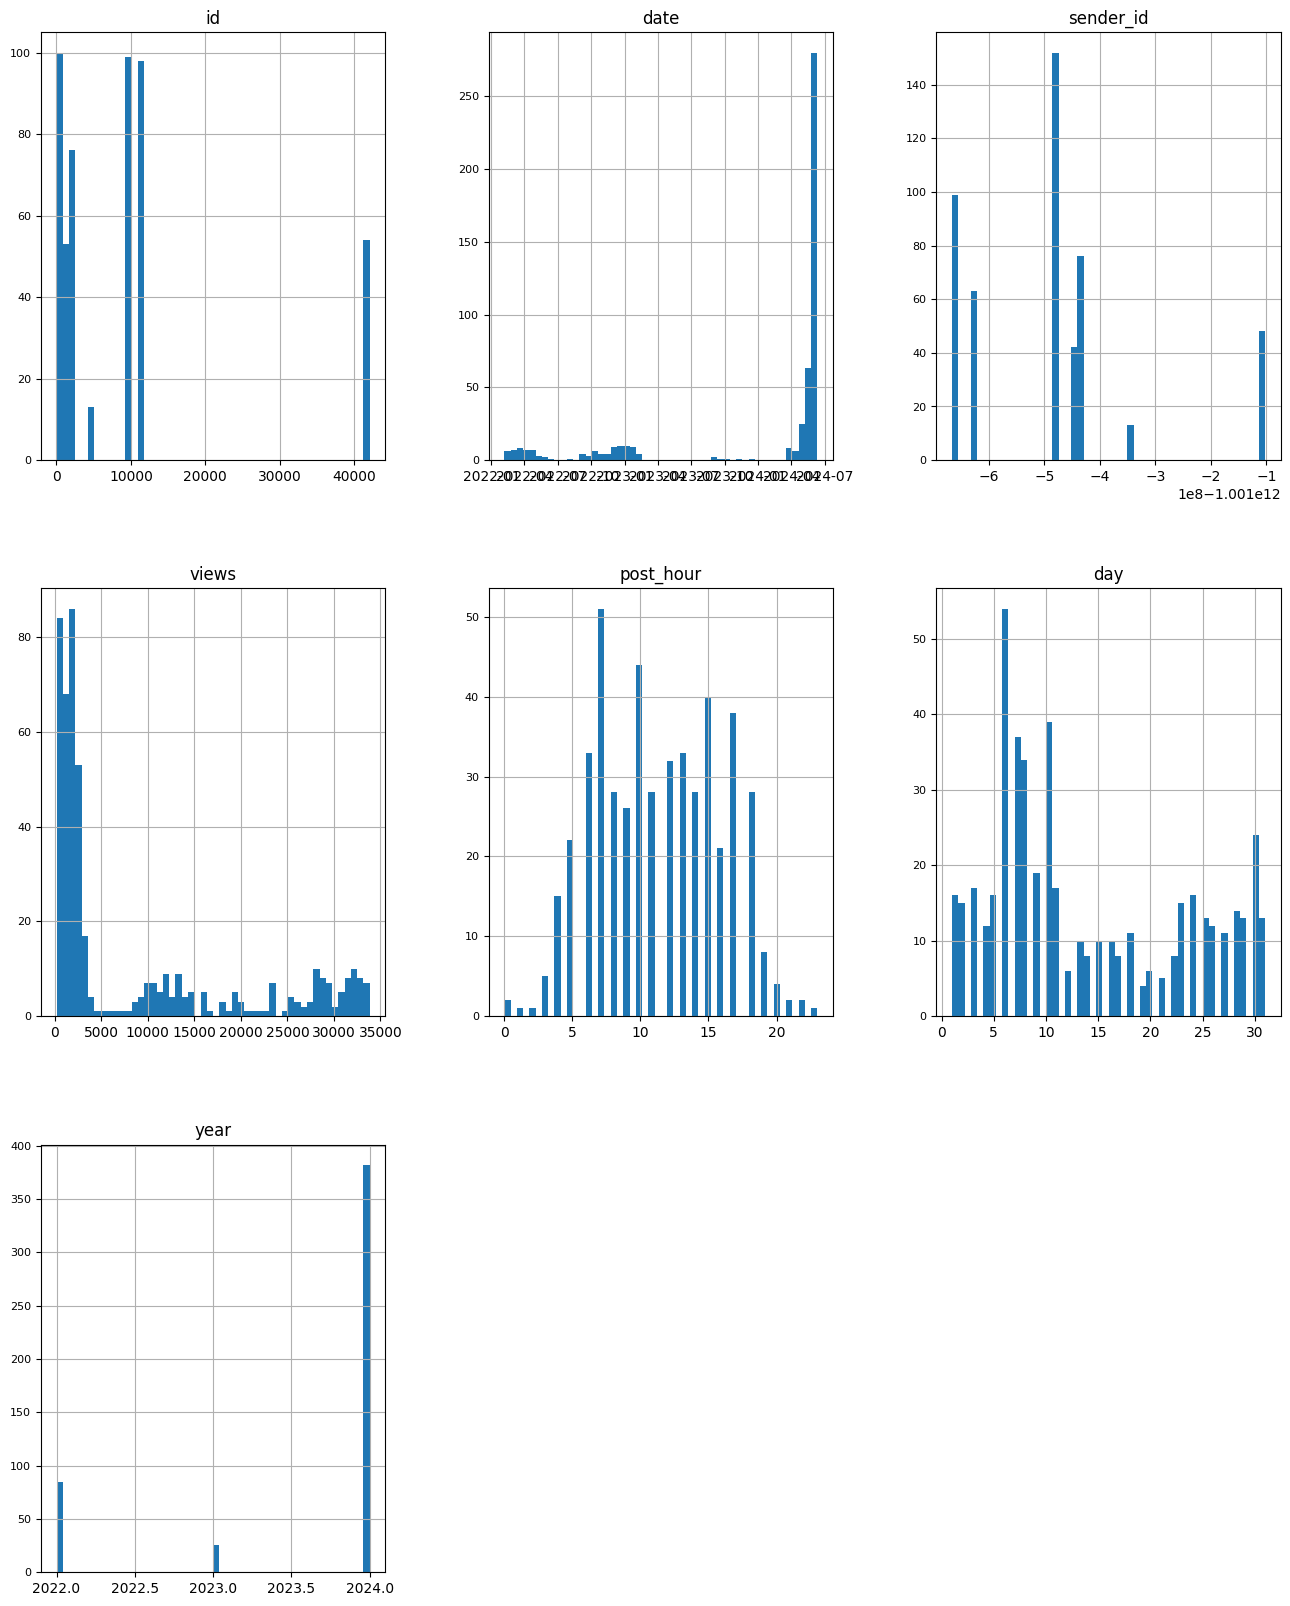

In [19]:
# Plotting histograms
num_col.hist(figsize=(16, 20), bins=50, ylabelsize=8)
plt.title("Histogram of Features that has a num type")
plt.show()

Based on the histogram, the post_hour column appears to be normally distributed, whereas the day, id, sender_id, and view columns are right-skewed.

### Distribution of Categorical Features

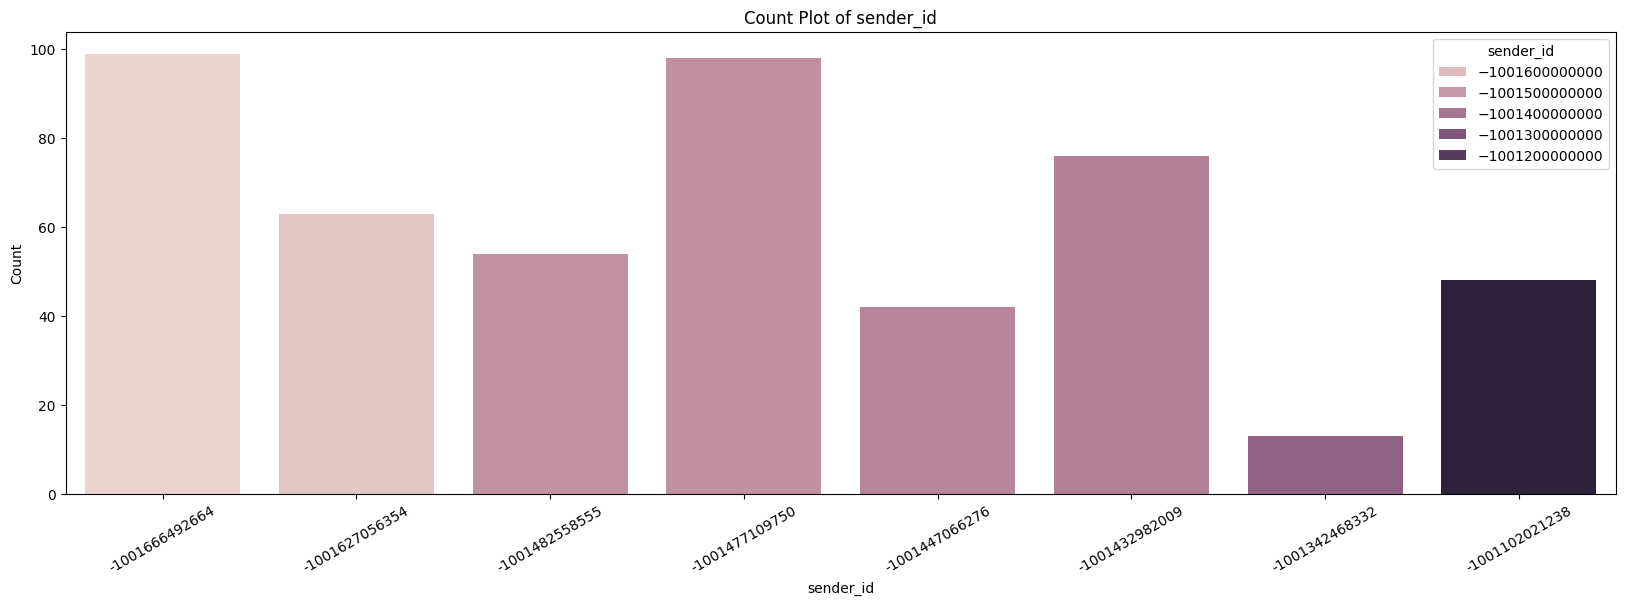

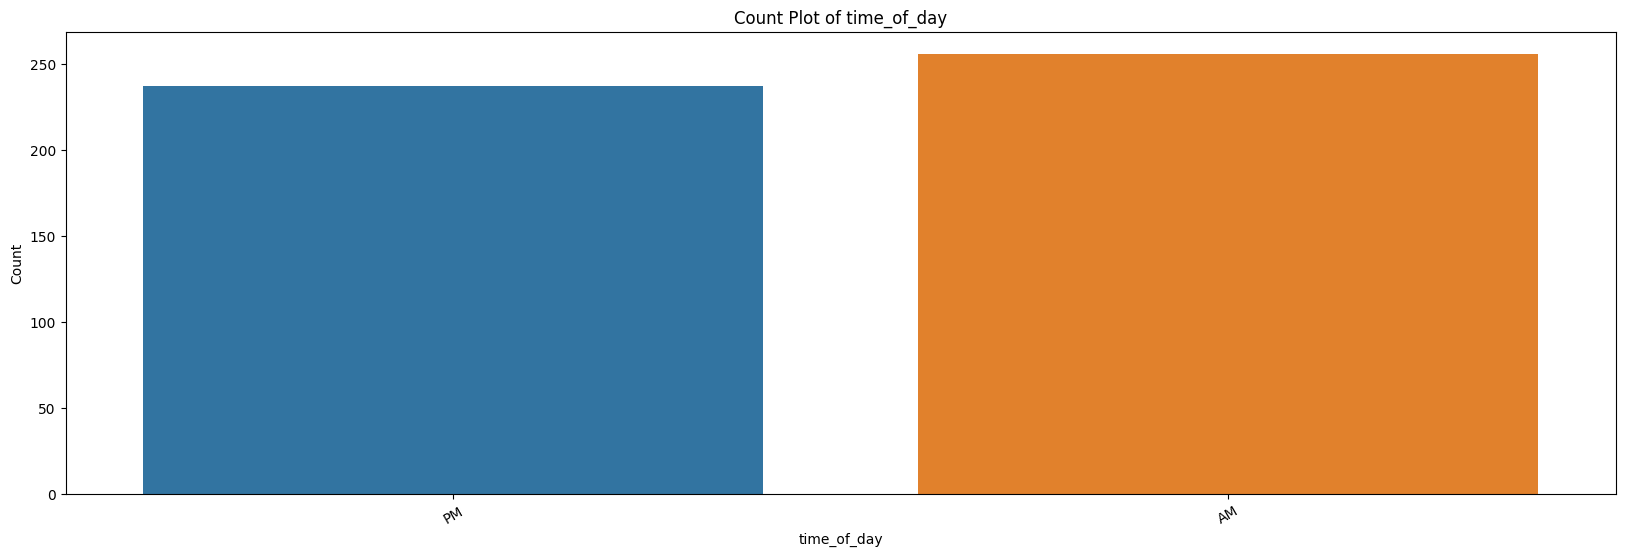

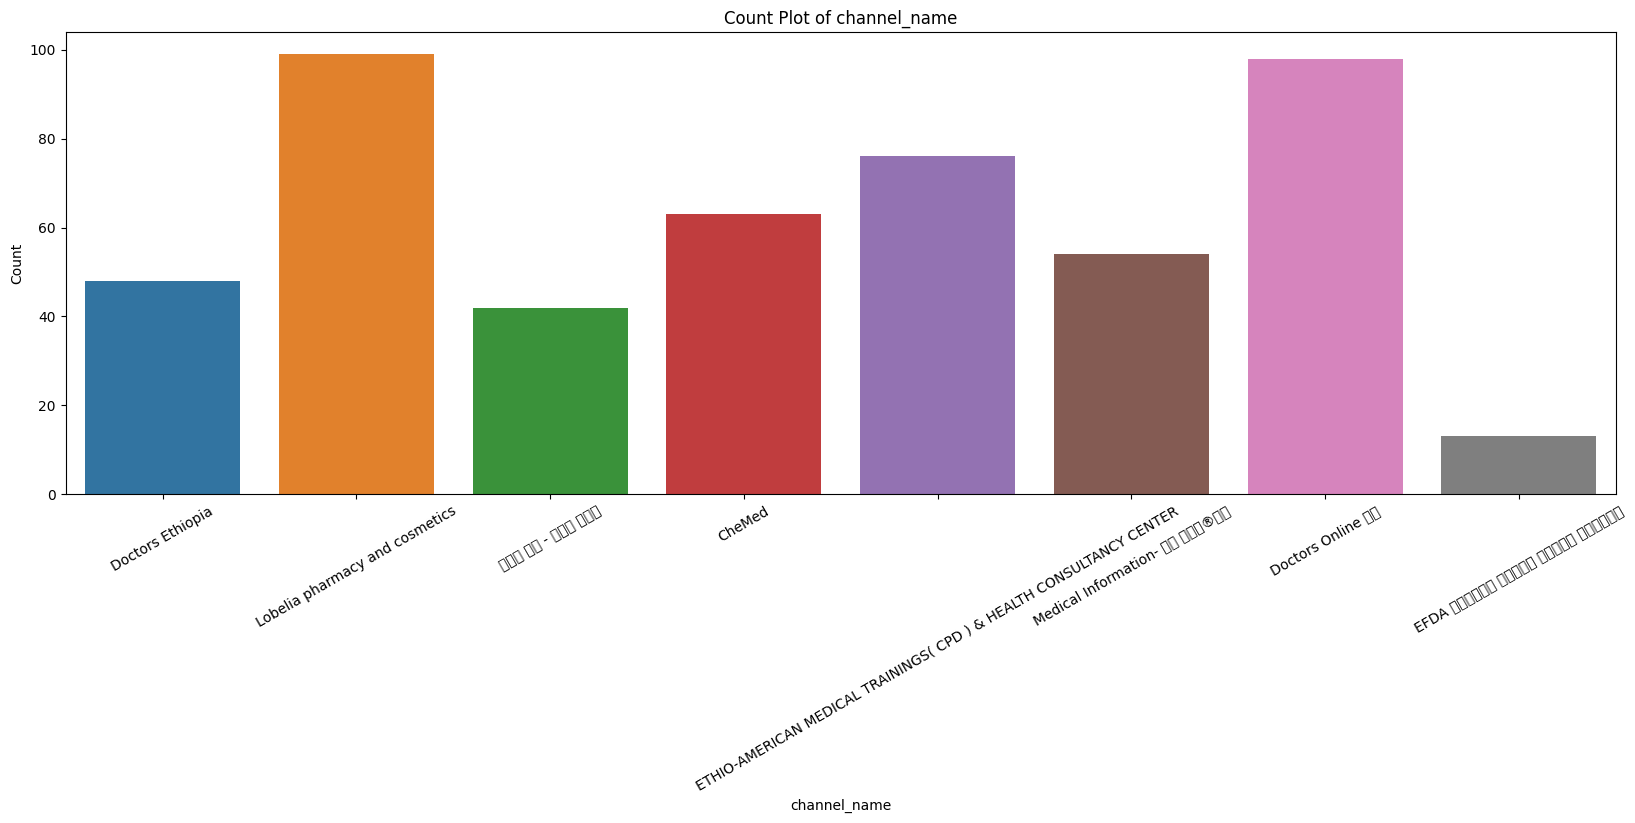

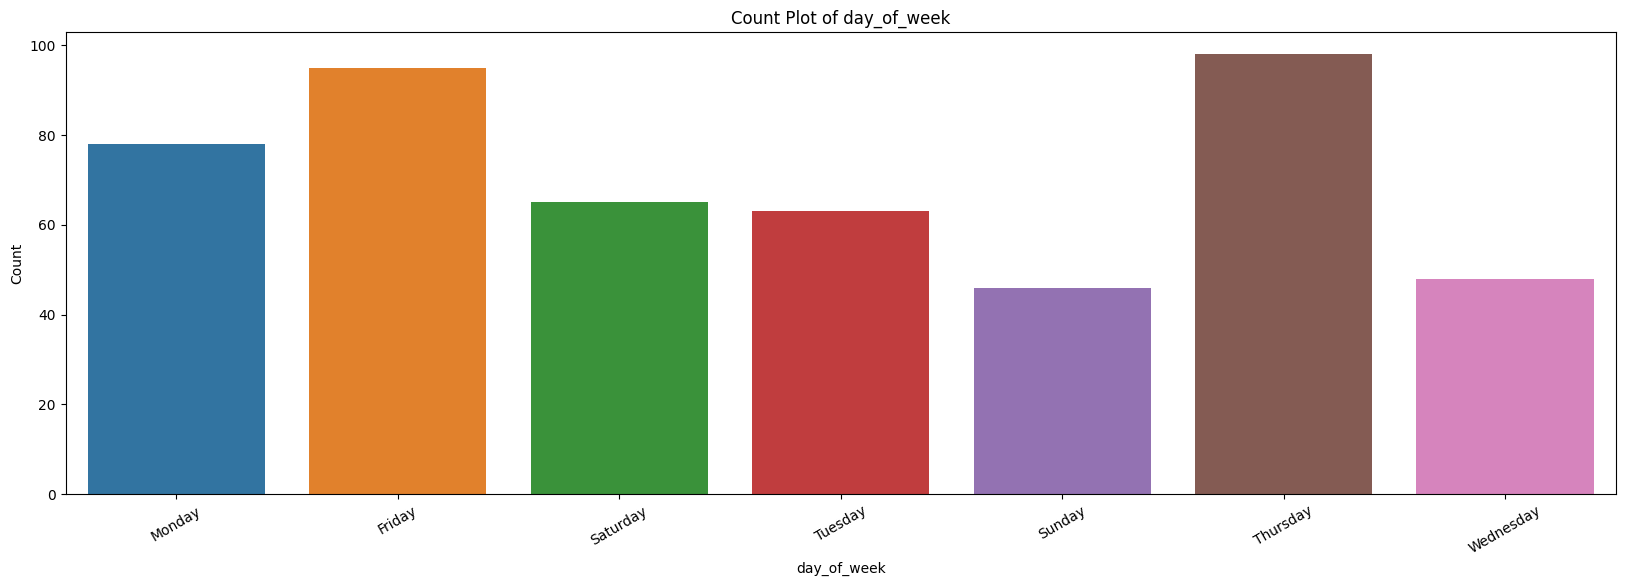

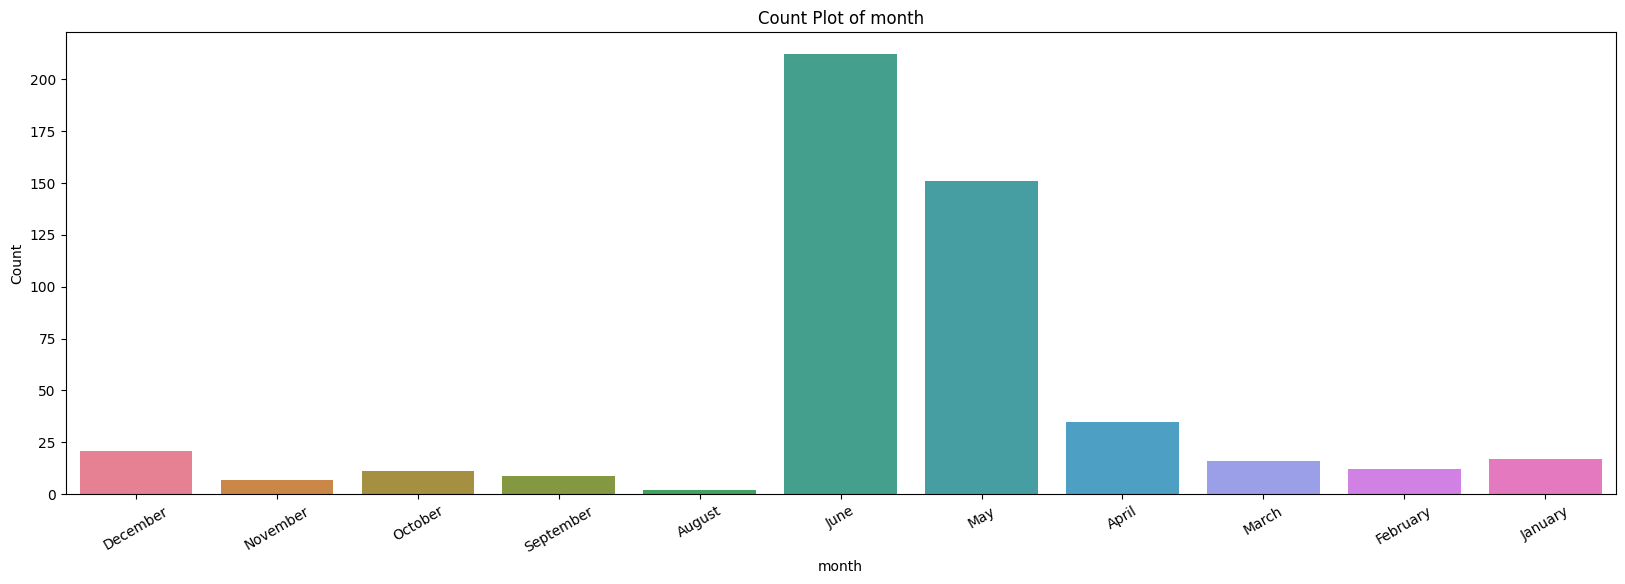

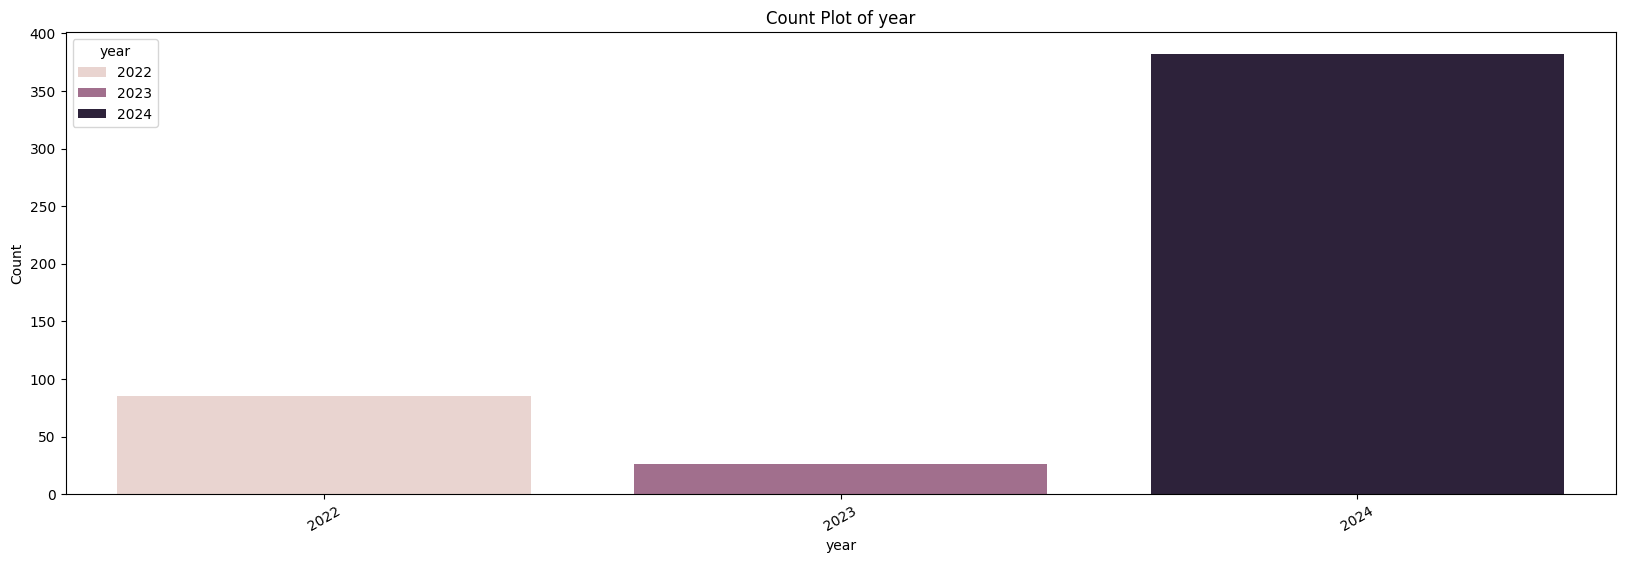

In [20]:
cols = ['sender_id', 'time_of_day', 'channel_name', 'day_of_week', 'month', 'year']
for col in cols:
    visualizer.plot_count(medical_df, col, hue_col=col)

The above count plot reveals the following insights:

- The sender IDs -1001666492664 and -1001477109750 have the highest number of posts.
- There are more posts at AM compared to PM.
- The channel names "Lobelia pharmacy and cosmetics" and "Doctors Online 🇪🇹" have a higher number of posts in the dataset.
- Thursday and Friday have more posts compared to other days of the week.
- June and May have the highest number of posts in the dataset, respectively.
- The year distributions show that 2022 had relatively higher posts, followed by a decrease in 2023 and then an increase in 2024 compared to other years.


## Bivariate analysis and Multivariate analysis

Multivariate analysis involves the study of three or more variables simultaneously. Visualizations for multivariate data can be more complex.

Bivariate analysis examines the relationship between two variables.

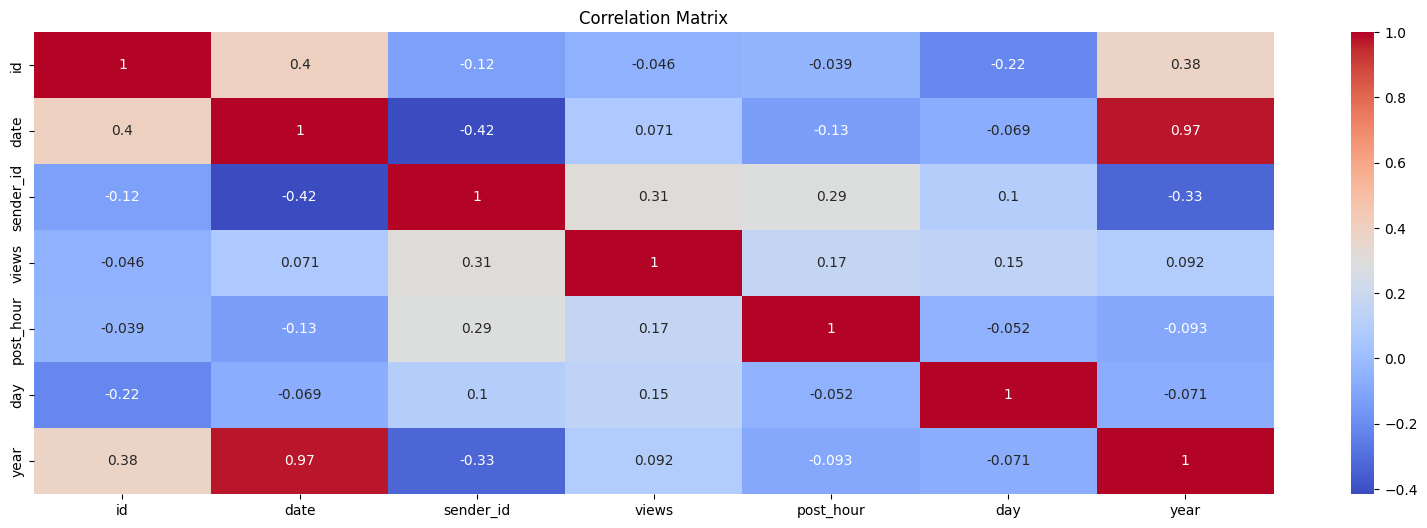

In [23]:
visualizer.correlation_matrix(num_col)

The plot is a correlation matrix, which shows the correlation coefficients between pairs of variables in the dataset. The matrix uses colors to represent the strength and direction of the correlations, with red indicating strong positive correlations, blue indicating strong negative correlations, and shades of white/gray indicating weaker or no correlations.

Here's an analysis of the correlations in the matrix:

1. **id**:
   - Positively correlated with `date` (0.4) and `year` (0.38).
   - Weakly or negatively correlated with other variables, with the most negative correlation with `day` (-0.22).

2. **date**:
   - Highly positively correlated with `year` (0.97).
   - Moderately negatively correlated with `sender_id` (-0.42).
   - Weak or negligible correlations with other variables.

3. **sender_id**:
   - Positively correlated with `views` (0.31) and `post_hour` (0.29).
   - Negatively correlated with `date` (-0.42) and `year` (-0.33).

4. **views**:
   - Positively correlated with `sender_id` (0.31).
   - Weakly positively correlated with `post_hour` (0.17) and `day` (0.15).
   - Negligible correlation with other variables.

5. **post_hour**:
   - Positively correlated with `sender_id` (0.29) and `views` (0.17).
   - Weakly or negatively correlated with other variables, with the most negative correlation with `day` (-0.052).

6. **day**:
   - Weak correlations with all variables, with the highest positive correlation with `sender_id` (0.1) and the highest negative correlation with `year` (-0.071).

7. **year**:
   - Highly positively correlated with `date` (0.97).
   - Negatively correlated with `sender_id` (-0.33).
   - Weak or negligible correlations with other variables.

**Key Observations**:
- The strongest positive correlation is between `date` and `year` (0.97), indicating that these variables are closely related.
- The strongest negative correlation is between `date` and `sender_id` (-0.42), suggesting an inverse relationship.
- `id` and `year` have a moderate positive correlation (0.38), while `id` and `day` have a moderate negative correlation (-0.22).
- `sender_id` shows a moderate positive correlation with `views` (0.31) and `post_hour` (0.29), indicating some relationship between these variables.

This correlation matrix helps identify relationships between the variables, which can be useful for further analysis or feature engineering in a predictive model.

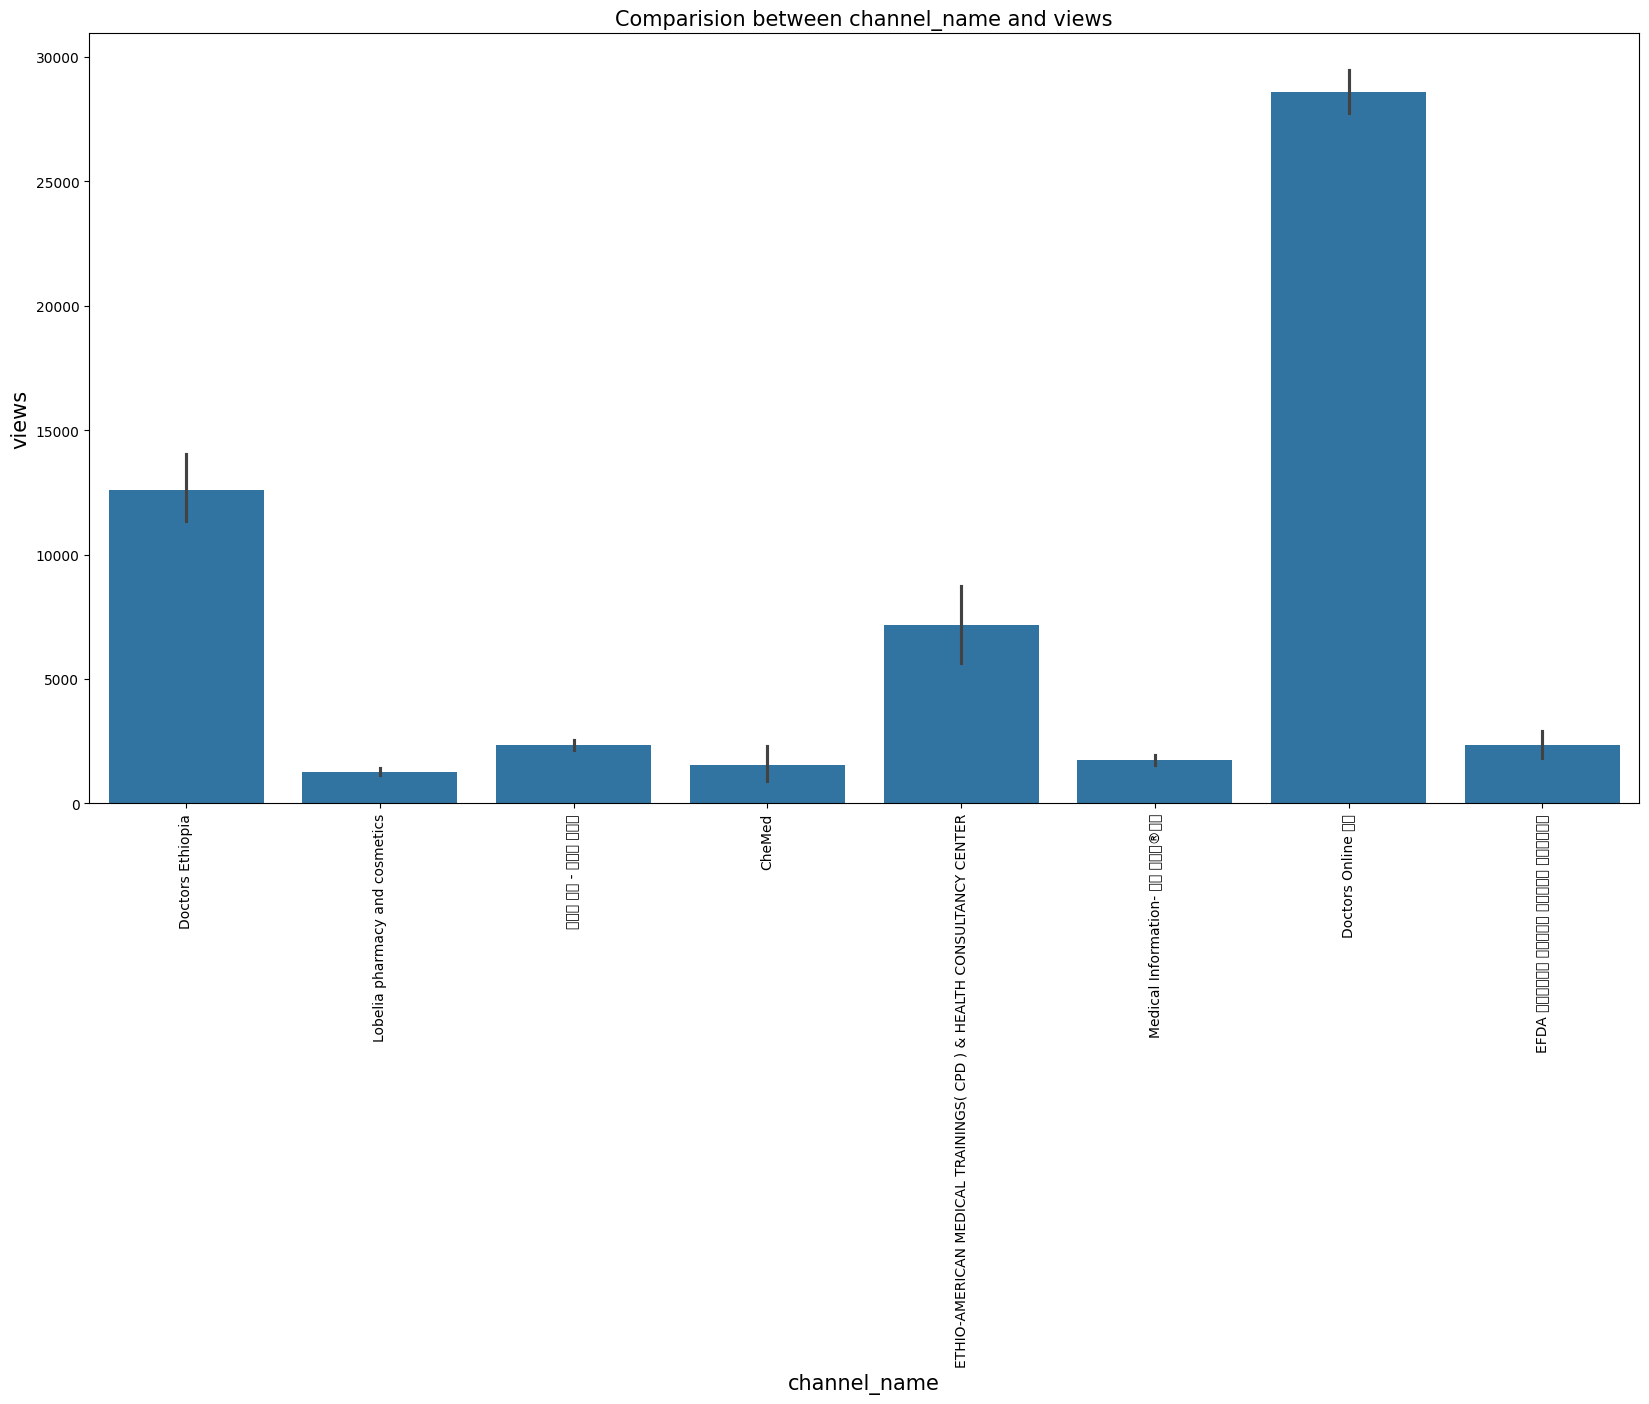

In [9]:
visualizer.plot_bar(medical_df, 'channel_name', 'views')

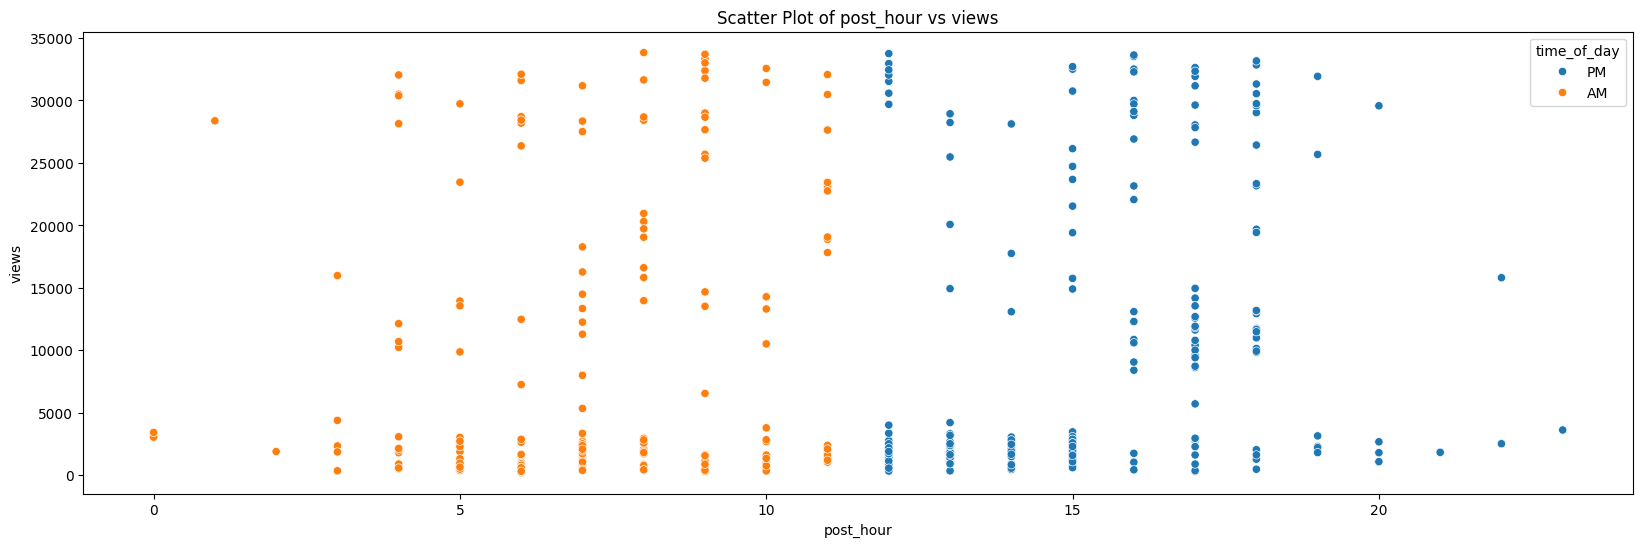

In [25]:
visualizer.plot_scatter(medical_df, "post_hour", 'views', hue_col='time_of_day')

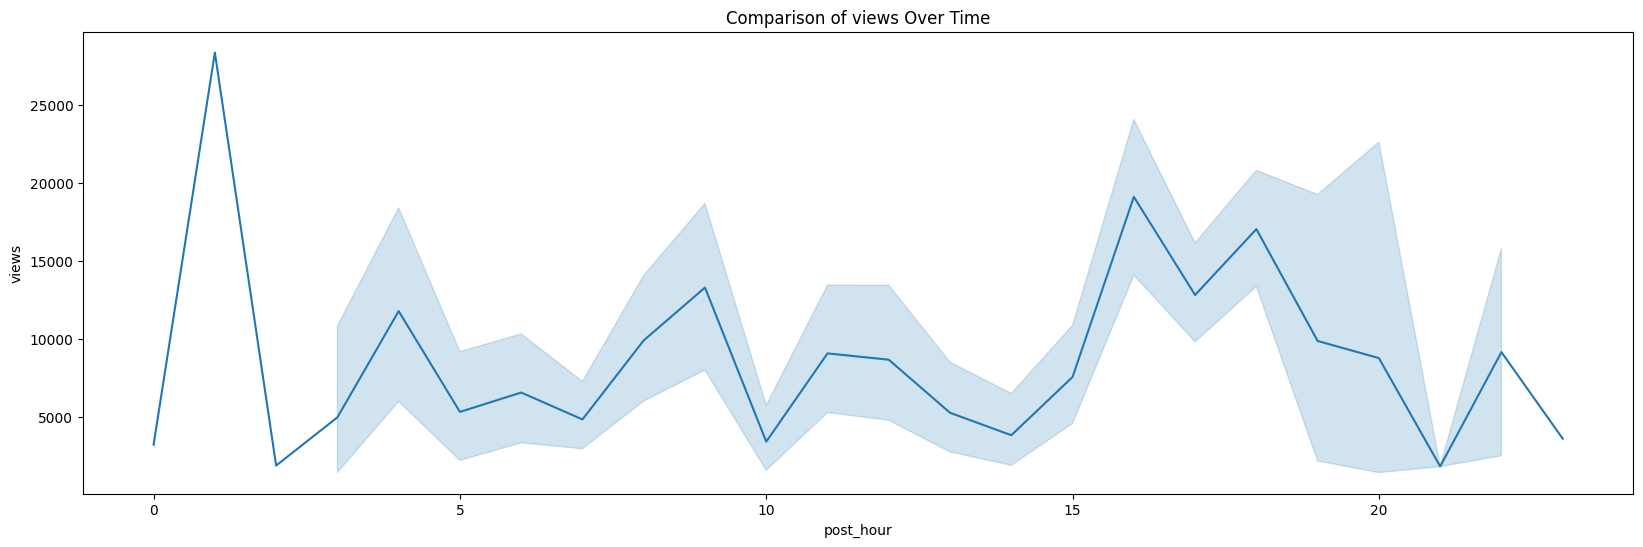

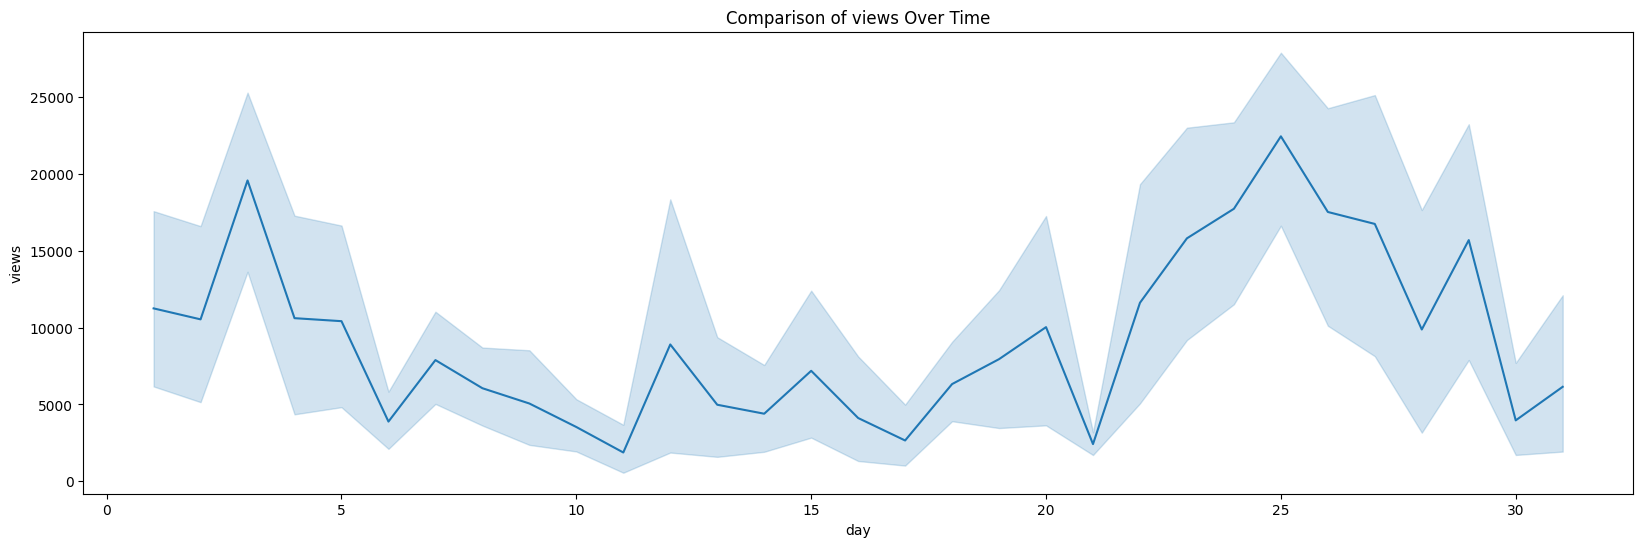

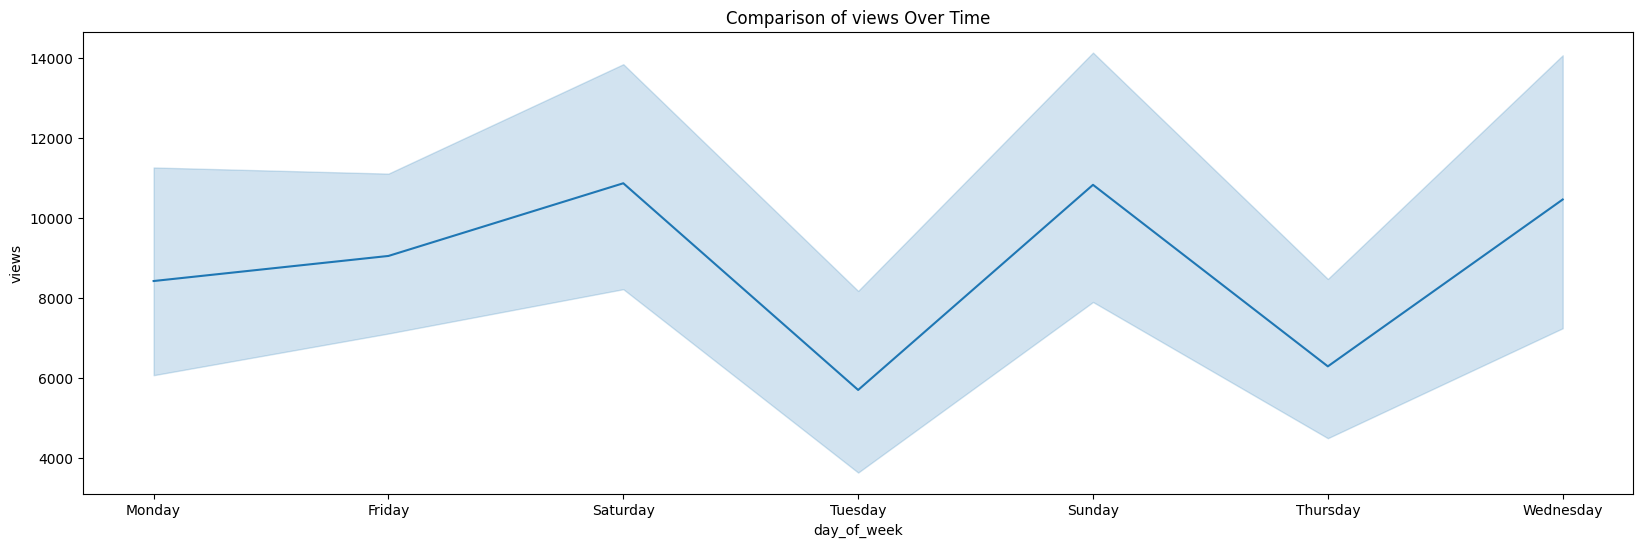

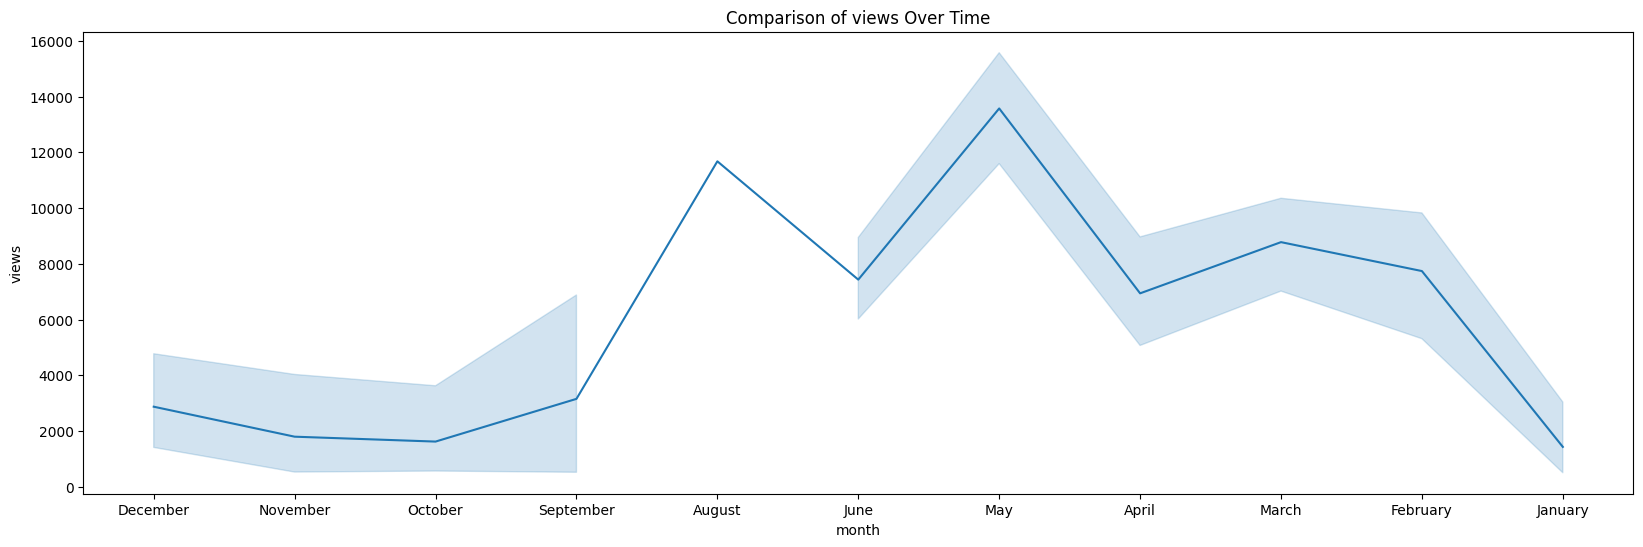

In [30]:
# line plot of views over different time
cols = ['post_hour', "day", "day_of_week", "month"]
for col in cols:
    visualizer.plot_line(medical_df, col, 'views')

The four plots show the number of views over different time intervals: by `post_hour` (hour of the day), by `day` (day of the month), by `day_of_week`(day of a week), and `month`(month).

### First Plot: Comparison of Views Over Time by Post Hour

1. **Peak at Hour 1**:
   - There's a significant peak at hour 1, where views reach over 25,000. This suggests a high level of activity or interest during this early hour.
   
2. **Variation Throughout the Day**:
   - Views drop significantly after hour 1 and show considerable fluctuation throughout the day.
   - Another notable peak occurs around hour 15 (3 PM), with views rising significantly again.

3. **Overall Trend**:
   - The views exhibit a fluctuating pattern with peaks and valleys, indicating varied user engagement at different hours of the day.

### Second Plot: Comparison of Views Over Time by Day

1. **Peak Around the Start and End of the Month**:
   - Views are higher at the beginning of the month (around day 1-3) and at the end of the month (around day 25-30), reaching up to 25,000.
   
2. **Mid-Month Drop**:
   - There's a noticeable drop in views during the mid-month period (days 10-20), with lower peaks and valleys.

3. **Overall Trend**:
   - Similar to the hourly pattern, the daily views show a fluctuating trend, indicating varied user engagement across different days of the month.

### Insights:

- **Hourly Activity**: There is significant user activity in the early hours of the day and mid-afternoon, with views peaking at hour 1 and hour 15.
- **Monthly Activity**: Users are more active at the beginning and end of the month, with a noticeable dip in the middle.
### Third Plot: Comparison of Views Over Ttime by Day of Week
1. __Trends__:
    - Monday: Starts with around 8,000 views.
    - Friday: Slight increase, reaching around 9,000 views.
    - Saturday: Peaks at around 12,000 views.
    - Tuesday: Drops significantly to about 5,000 views.
    - Sunday: Another peak around 12,000 views.
    - Thursday: Drops again to around 6,000 views.
    - Wednesday: Slight increase to around 8,000 views.
2. __Day of the Week Analysis__:
    - High View Days: Saturday and Sunday show significant peaks in views.
    - Low View Days: Tuesday and Thursday have the lowest views, indicating these might be the least engaging days for the audience.
### Fourth Plot: Comparison of Views Over Time by Month
1. __Trends__:
    - December: Starts around 4,000 views.
    - November: Slight decrease to about 3,500 views.
    - October: Further decrease to about 2,500 views.
    - September: Similar to October, around 2,500 views.
    - August: Sharp increase to around 14,000 views.
    - June: Increase to around 7,000 views.
    - May: Peaks at around 15,000 views.
    - April: Drops to around 9,000 views.
    - March: Slight decrease to about 8,000 views.
    - February: Decrease to around 6,000 views.
    - January: Lowest at around 3,000 views.Monday: Starts with around 8,000 views.
2. __Day of the Week Analysis__:
    - High View Months: May and August show significant peaks in views.
    - Low View Months: January and October have the lowest views, suggesting seasonal trends or specific events affecting viewership.
### Recommendations:
These trends can inform content scheduling, user engagement strategies, and further analysis to understand the underlying reasons for these peaks and troughs in views.The two plots show the number of views over different time intervals: by `post_hour` (hour of the day) and by `day` (day of the month).

__Content Scheduling__:
   - For higher engagement, schedule key content on Saturdays and Sundays.
   - Avoid major releases or important announcements on Tuesdays and Thursdays.
   
__Monthly Strategy__:
   - Focus on releasing important content or campaigns in May and August to leverage high viewership periods.
   - Use the lower view months like January and October for planning, content creation, and minor updates.